# Vehicle Recognizer

In this project i will try to clasify 18 different vehicles:

1. Cars (sedan, SUV, coupe, hatchback, etc.)
2. Trucks (pickup truck, delivery truck, semi-truck, etc.)
3. Buses (city bus, school bus, tour bus, etc.)
4. Motorcycles (sport bike, cruiser, touring, etc.)
5. Bicycles (road bike, mountain bike, etc.)
6. Boats (sailboat, motorboat, canoe, etc.)
7. Airplanes (commercial jet, prop plane, helicopter, etc.)
8. Trains (passenger train, freight train, etc.)
9. Construction vehicles (bulldozer, excavator, backhoe, etc.)
10. Agricultural vehicles (tractor, combine harvester, etc.)
11. Emergency vehicles (ambulance, fire truck, police car, etc.)
12. Military vehicles (tank, armored vehicle, etc.)
13. RVs (recreational vehicle, motorhome, etc.)
14. Watercrafts (jet ski, speedboat, etc.)
15. Specialty vehicles (food truck, mobile crane, etc.)
16. Public transportation (subway train, tram, cable car, etc.)
17. Aerial tramway
18. Mining vehicles (bulldozer, excavator, etc.)

## Setting up the libraries

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Capstone projects/Vehicle Recognizer

/content/drive/My Drive/Capstone projects/Vehicle Recognizer


## Download Images from Browser

In [ ]:
doc(search_images_ddg)

In [ ]:
vehicles_labels = [
    "Cars",
    "Trucks ",
    "Buses",
    "Motorcycles",
    "Bicycles",
    "Boats",
    "Airplanes",
    "Trains",
    "Construction vehicles",
    "Agricultural vehicles",
    "Emergency vehicles",
    "Military vehicles ",
    "RVs",
    "Watercrafts",
    "Specialty vehicles ",
    "Public transportation",
    "Aerial tramway",
    "Mining vehicles"
]
len(vehicles_labels)

20

In [ ]:
images = search_images_ddg(vehicles_labels[0], max_images=300)
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 300 -- One Image URL => https://cdn.motor1.com/images/mgl/b2KE6/s1/luxury-cars-lead.jpg'

In [ ]:
dest = "Cars.jpg"
download_url(images[0], dest, show_progress=False)

Path('Cars.jpg')

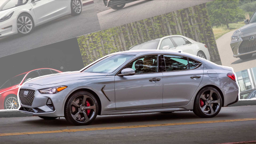

In [ ]:
image = Image.open(dest)
image.to_thumb(256, 256)

In [ ]:
data_path = "data"
if not os.path.exists(data_path): 
  os.mkdir(data_path)

for vehicles_type in vehicles_labels:

  dest = f"{data_path}/{vehicles_type}"
  if not os.path.exists(dest): 
    os.mkdir(dest)

  try:
    vehicles_image_urls = search_images_ddg(vehicles_type, max_images=300)
    download_images(dest, urls = vehicles_image_urls)
    
  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#5678) [Path('data/Cars/2bc09011-ee60-460e-a7f4-e623ac43c34b.jpg'),Path('data/Cars/ad799cce-d20c-4909-b0b3-770d9a494abd.jpg'),Path('data/Cars/e88d4dd7-e852-4d9c-8a1c-a4d8c0dfed5e.jpg'),Path('data/Cars/d918b742-e85b-47c0-aa22-8ba3e694b409.jpg'),Path('data/Cars/864f0e4f-0891-41f3-af7b-0783f4c72a71.jpg'),Path('data/Cars/992260e7-2c1f-4f2c-9ba3-522ff19d92ef.jpg'),Path('data/Cars/e92a0b59-9790-47fc-b307-d86085a07e60.jpg'),Path('data/Cars/127bb354-c4cd-478d-aee5-07be8c17af2a.jpg'),Path('data/Cars/b7597c62-2765-4458-9012-b3d85a2111cf.jpg'),Path('data/Cars/4712efea-6df6-4ba5-b4ab-5271287dd9cf.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#218) [Path('data/Cars/a0522246-7b8d-41a6-b12b-509a21517db9.jpg'),Path('data/Cars/4e711677-7c51-47ef-905f-9b9bcb4a2f28.jpg'),Path('data/Cars/f384c98e-3039-4946-b1a5-7f40e5cac39b.jpg'),Path('data/Cars/fe2d0c5f-422f-4586-a1f5-bbe15732d232.jpg'),Path('data/Cars/944ad78b-f202-4628-a01d-1bc2df440871.jpg'),Path('data/Cars/674b3215-e829-431c-8d82-b15787bfd6e2.jpg'),Path('data/Cars/b2d7da50-a923-4d9d-a86a-f5fcb524b7c2.png'),Path('data/Cars/b87f48a6-2054-469d-82a1-c8a8887081d9.jpg'),Path('data/Cars/38616a2c-0f20-4b94-9775-3538d0de6f3d.jpg'),Path('data/Cars/76727c73-70cc-4018-90f3-2a47cd13d7c3.jpg')...]

In [ ]:
failed.map(Path.unlink)

In [ ]:
doc(get_image_files)

## From Data to Data Loaders

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               
    item_tfms=Resize(256))                           

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

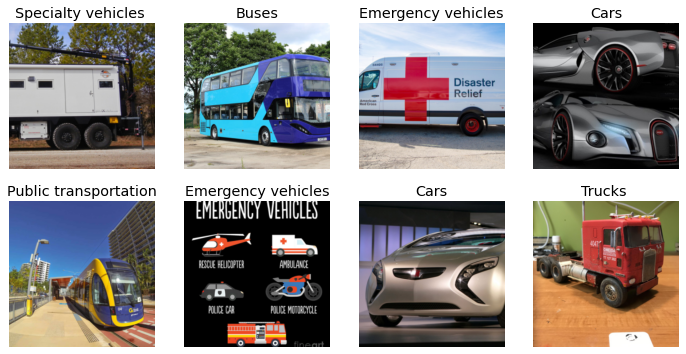

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

## Augmentation

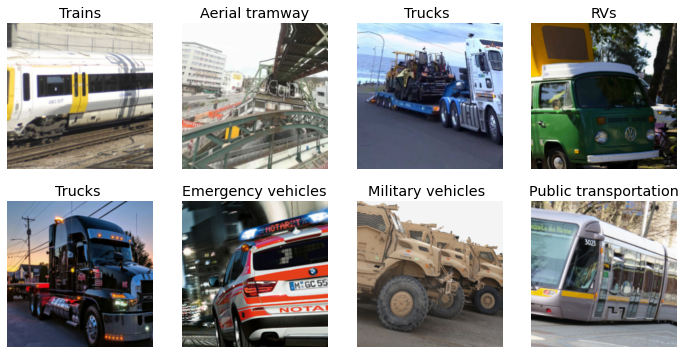

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(256, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "vehicles_dataloader_v0.pkl")